# **Import Liberies**

In [ ]:
from PIL import Image
import os
import cv2
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **convert image into jpg and rename images**

**Stop sign**

In [ ]:
# Define source and destination folders
source_folder = "/content/drive/MyDrive/project_445/Project/Stop sign"  # Change this to the folder containing PNG files
destination_folder = "/content/drive/MyDrive/project_445/Dataset/Stop sign"  # Change this to your desired output folder

# Create destination folder if it doesn't exist
if not os.path.exists(destination_folder):
    os.makedirs(destination_folder)

# Get all PNG files from the source folder
png_files = [f for f in os.listdir(source_folder) if f.lower().endswith(".png")]

# Sort files to maintain order
png_files.sort()

# Convert and rename PNG files
for index, file in enumerate(png_files, start=1):
    img_path = os.path.join(source_folder, file)
    img = Image.open(img_path)
    rgb_img = img.convert("RGB")  # Convert to RGB mode (JPG does not support transparency)

    new_filename = f"{index}.jpg"
    save_path = os.path.join(destination_folder, new_filename)

    rgb_img.save(save_path, "JPEG")
    print(f"Saved: {save_path}")

print("Conversion complete!")


Saved: /content/drive/MyDrive/project_445/Dataset/Stop sign/1.jpg
Saved: /content/drive/MyDrive/project_445/Dataset/Stop sign/2.jpg
Saved: /content/drive/MyDrive/project_445/Dataset/Stop sign/3.jpg
Saved: /content/drive/MyDrive/project_445/Dataset/Stop sign/4.jpg
Saved: /content/drive/MyDrive/project_445/Dataset/Stop sign/5.jpg
Saved: /content/drive/MyDrive/project_445/Dataset/Stop sign/6.jpg
Saved: /content/drive/MyDrive/project_445/Dataset/Stop sign/7.jpg
Saved: /content/drive/MyDrive/project_445/Dataset/Stop sign/8.jpg
Saved: /content/drive/MyDrive/project_445/Dataset/Stop sign/9.jpg
Saved: /content/drive/MyDrive/project_445/Dataset/Stop sign/10.jpg
Saved: /content/drive/MyDrive/project_445/Dataset/Stop sign/11.jpg
Saved: /content/drive/MyDrive/project_445/Dataset/Stop sign/12.jpg
Saved: /content/drive/MyDrive/project_445/Dataset/Stop sign/13.jpg
Saved: /content/drive/MyDrive/project_445/Dataset/Stop sign/14.jpg
Saved: /content/drive/MyDrive/project_445/Dataset/Stop sign/15.jpg
Save

**Non stop sign**

In [ ]:
# Define source and destination folders
source_folder = "/content/drive/MyDrive/project_445/Project/Non stop sign"
destination_folder = "/content/drive/MyDrive/project_445/Dataset/Non stop sign"

# Create destination folder if it doesn't exist
if not os.path.exists(destination_folder):
    os.makedirs(destination_folder)

# Get all PNG files from the source folder
png_files = [f for f in os.listdir(source_folder) if f.lower().endswith(".png")]

# Sort files to maintain order
png_files.sort()

# Convert and rename PNG files
for index, file in enumerate(png_files, start=1):
    img_path = os.path.join(source_folder, file)
    img = Image.open(img_path)
    rgb_img = img.convert("RGB")  # Convert to RGB mode (JPG does not support transparency)

    new_filename = f"{index}.jpg"
    save_path = os.path.join(destination_folder, new_filename)

    rgb_img.save(save_path, "JPEG")
    print(f"Saved: {save_path}")

print("Non stop sign Conversion complete!")

Saved: /content/drive/MyDrive/project_445/Dataset/Non stop sign/1.jpg
Saved: /content/drive/MyDrive/project_445/Dataset/Non stop sign/2.jpg
Saved: /content/drive/MyDrive/project_445/Dataset/Non stop sign/3.jpg
Saved: /content/drive/MyDrive/project_445/Dataset/Non stop sign/4.jpg
Saved: /content/drive/MyDrive/project_445/Dataset/Non stop sign/5.jpg
Saved: /content/drive/MyDrive/project_445/Dataset/Non stop sign/6.jpg
Saved: /content/drive/MyDrive/project_445/Dataset/Non stop sign/7.jpg
Saved: /content/drive/MyDrive/project_445/Dataset/Non stop sign/8.jpg
Saved: /content/drive/MyDrive/project_445/Dataset/Non stop sign/9.jpg
Saved: /content/drive/MyDrive/project_445/Dataset/Non stop sign/10.jpg
Saved: /content/drive/MyDrive/project_445/Dataset/Non stop sign/11.jpg
Saved: /content/drive/MyDrive/project_445/Dataset/Non stop sign/12.jpg
Saved: /content/drive/MyDrive/project_445/Dataset/Non stop sign/13.jpg
Saved: /content/drive/MyDrive/project_445/Dataset/Non stop sign/14.jpg
Saved: /content

# **Load & Preprocess Images**

In [ ]:
# Cell 1: Data Loading and Preprocessing
import os
import cv2
import numpy as np

# Paths to dataset
dataset_path = "/content/drive/MyDrive/project_445/Dataset"
categories = ["Non stop sign", "Stop sign"]

# Image parameters
IMG_SIZE = 64  # Resize images to 64x64

data = []
labels = []
original_images = []  # Store original images for comparison

# Load images and preprocess
for label, category in enumerate(categories):
    folder_path = os.path.join(dataset_path, category)
    for filename in os.listdir(folder_path):
        img_path = os.path.join(folder_path, filename)
        # Load original image
        img_original = cv2.imread(img_path)
        original_images.append(img_original)

        # Preprocess image
        img = cv2.resize(img_original, (IMG_SIZE, IMG_SIZE))  # Resize
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # Convert to grayscale
        img = img / 255.0  # Normalize
        data.append(img.flatten())  # Flatten image into 1D array
        labels.append(label)  # 0 = Non stop sign, 1 = Stop sign

# Convert to numpy arrays
X = np.array(data)
y = np.array(labels)

print("Dataset loaded with shape:", X.shape)
print(f"Number of original images stored: {len(original_images)}")

Dataset loaded with shape: (100, 4096)
Number of original images stored: 100


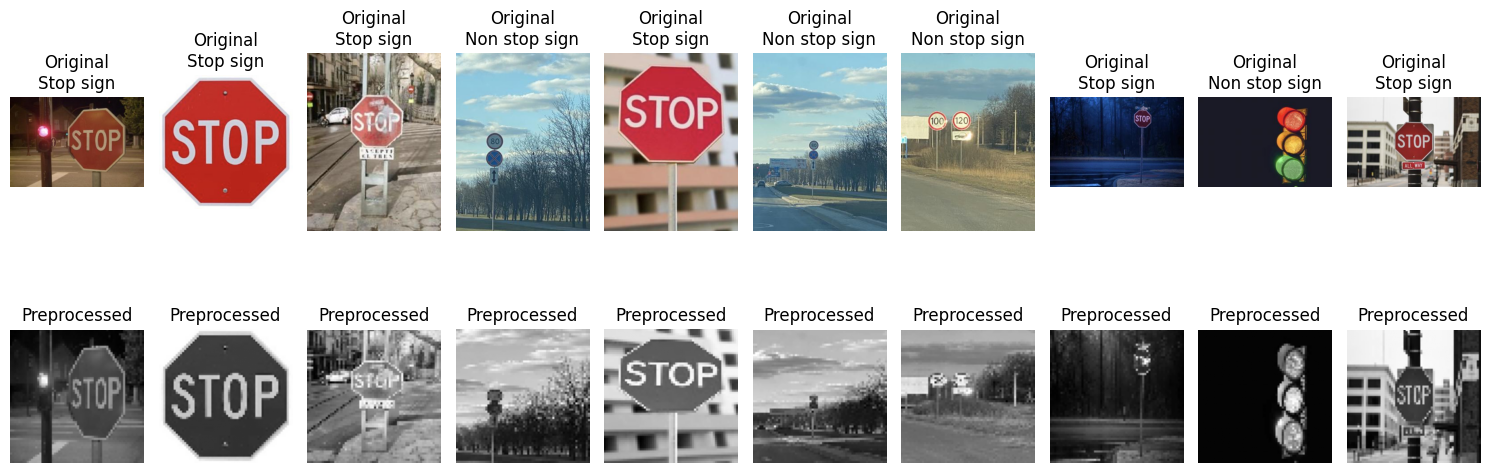

In [ ]:
# Cell 2
import matplotlib.pyplot as plt

# Make sure Cell 1 has been run first
num_images = 10
random_indices = np.random.choice(len(original_images), num_images, replace=False)

plt.figure(figsize=(15, 6))
for i, idx in enumerate(random_indices):
    plt.subplot(2, num_images, i + 1)
    original_rgb = cv2.cvtColor(original_images[idx], cv2.COLOR_BGR2RGB)
    plt.imshow(original_rgb)
    plt.title(f"Original\n{categories[y[idx]]}")
    plt.axis('off')

    plt.subplot(2, num_images, i + num_images + 1)
    preprocessed_img = X[idx].reshape(IMG_SIZE, IMG_SIZE)
    plt.imshow(preprocessed_img, cmap='gray')
    plt.title("Preprocessed")
    plt.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
from skimage.feature import hog
import numpy as np

# Assuming X and IMG_SIZE are defined from your initial preprocessing

hog_features = []
for img in X:
    hog_feat = hog(img.reshape(IMG_SIZE, IMG_SIZE),
                  pixels_per_cell=(8, 8),
                  cells_per_block=(2, 2),
                  feature_vector=True)
    hog_features.append(hog_feat)

# Convert to NumPy array
X_features = np.array(hog_features)
print("Feature extraction completed. Shape:", X_features.shape)

Feature extraction completed. Shape: (100, 1764)


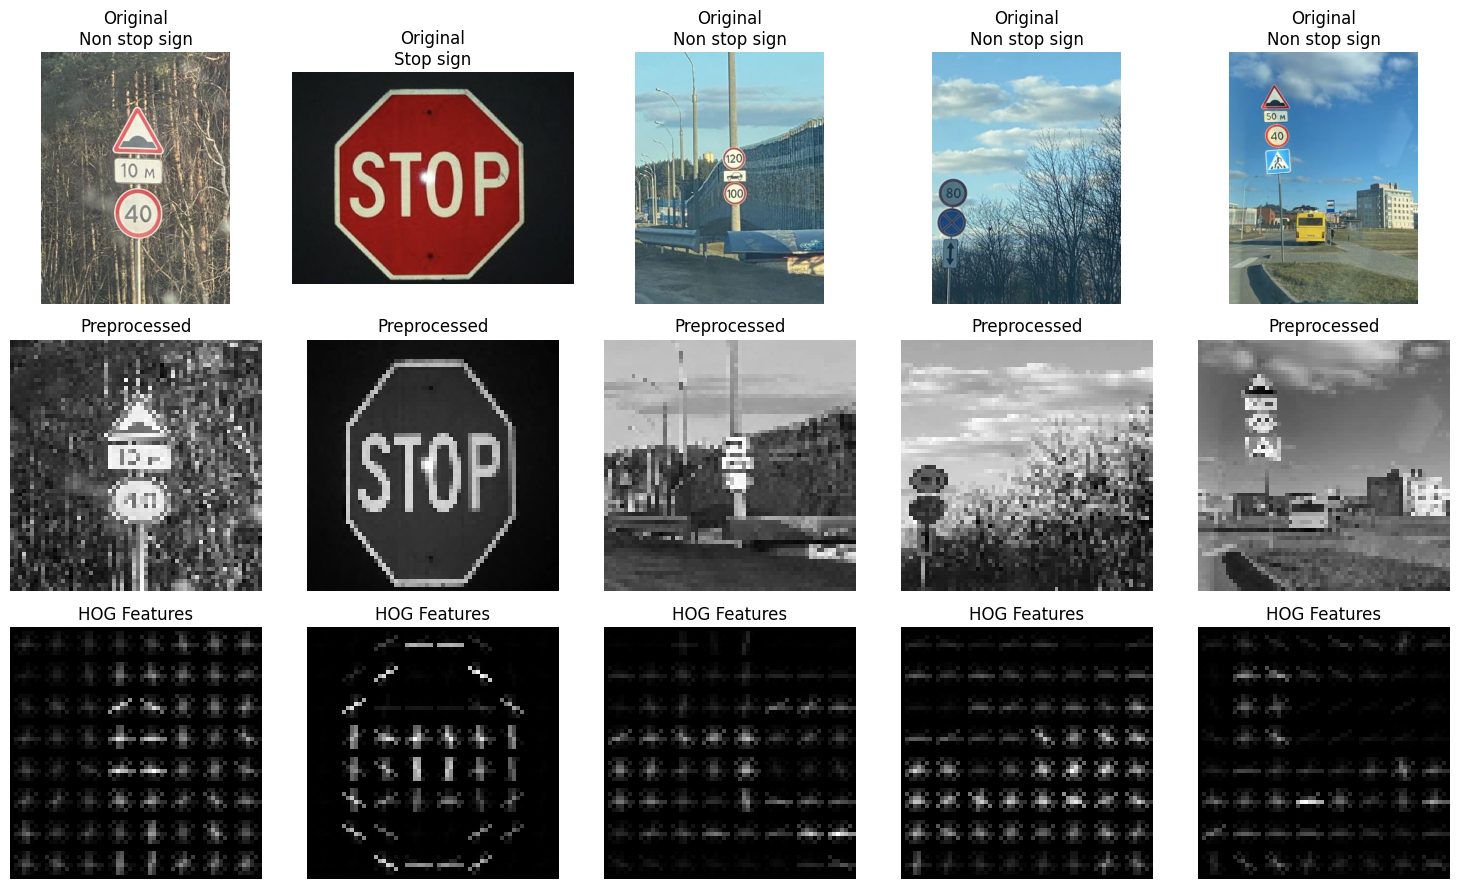

In [ ]:
import matplotlib.pyplot as plt

# Assuming X, original_images, categories, and y are defined

# Visualize HOG feature extraction for 5 samples
num_samples = 5
random_indices = np.random.choice(len(X), num_samples, replace=False)

plt.figure(figsize=(15, 9))
for i, idx in enumerate(random_indices):
    # Original image
    plt.subplot(3, num_samples, i + 1)
    original_rgb = cv2.cvtColor(original_images[idx], cv2.COLOR_BGR2RGB)
    plt.imshow(original_rgb)
    plt.title(f"Original\n{categories[y[idx]]}")
    plt.axis('off')

    # Preprocessed image
    plt.subplot(3, num_samples, i + num_samples + 1)
    preprocessed_img = X[idx].reshape(IMG_SIZE, IMG_SIZE)
    plt.imshow(preprocessed_img, cmap='gray')
    plt.title("Preprocessed")
    plt.axis('off')

    # HOG visualization
    plt.subplot(3, num_samples, i + 2*num_samples + 1)
    _, hog_image = hog(preprocessed_img,
                      pixels_per_cell=(8, 8),
                      cells_per_block=(2, 2),
                      visualize=True)
    plt.imshow(hog_image, cmap='gray')
    plt.title("HOG Features")
    plt.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np

# Assuming X_features and y are defined from HOG extraction

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_features, y,
                                                    test_size=0.2,
                                                    random_state=42)
print(f"Training samples: {len(X_train)}, Testing samples: {len(X_test)}")

# Store original indices for visualization
X_full_indices = np.arange(len(X_features))
X_train_indices, X_test_indices = train_test_split(X_full_indices,
                                                  test_size=0.2,
                                                  random_state=42)

# Optional: Check label distribution
print(f"Training set label distribution: {np.bincount(y_train)} (0: Non stop, 1: Stop)")
print(f"Testing set label distribution: {np.bincount(y_test)} (0: Non stop, 1: Stop)")

Training samples: 80, Testing samples: 20
Training set label distribution: [38 42] (0: Non stop, 1: Stop)
Testing set label distribution: [12  8] (0: Non stop, 1: Stop)


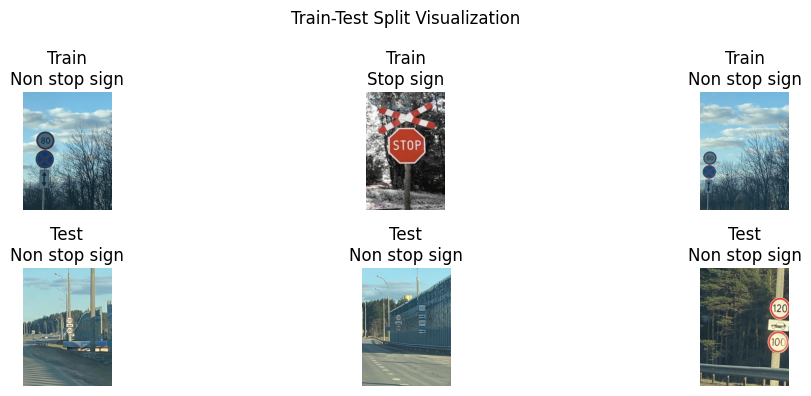

In [ ]:
import matplotlib.pyplot as plt

# Assuming original_images, categories, X_train_indices, X_test_indices, y_train, y_test are defined

# Visualize 3 samples from training and testing sets
num_samples = 3
train_sample_indices = np.random.choice(len(X_train), num_samples, replace=False)
test_sample_indices = np.random.choice(len(X_test), num_samples, replace=False)

plt.figure(figsize=(12, 4))

# Training samples
for i, idx in enumerate(train_sample_indices):
    orig_idx = X_train_indices[idx]
    plt.subplot(2, num_samples, i + 1)
    original_rgb = cv2.cvtColor(original_images[orig_idx], cv2.COLOR_BGR2RGB)
    plt.imshow(original_rgb)
    plt.title(f"Train\n{categories[y_train[idx]]}")
    plt.axis('off')

# Testing samples
for i, idx in enumerate(test_sample_indices):
    orig_idx = X_test_indices[idx]
    plt.subplot(2, num_samples, i + num_samples + 1)
    original_rgb = cv2.cvtColor(original_images[orig_idx], cv2.COLOR_BGR2RGB)
    plt.imshow(original_rgb)
    plt.title(f"Test\n{categories[y_test[idx]]}")
    plt.axis('off')

plt.suptitle("Train-Test Split Visualization")
plt.tight_layout()
plt.show()

# **Model create**

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np

# Assuming X_train, X_test, y_train, y_test are defined from previous steps

# Train an SVM model
model = SVC(kernel='linear')
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy:", accuracy)

# Detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=categories))

# Confusion matrix (computed but not visualized here)
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)

# Store predictions and indices for visualization in the next cell
X_full_indices = np.arange(len(X_features))
_, X_test_indices = train_test_split(X_full_indices, test_size=0.2, random_state=42)

Model Accuracy: 0.9

Classification Report:
               precision    recall  f1-score   support

Non stop sign       0.92      0.92      0.92        12
    Stop sign       0.88      0.88      0.88         8

     accuracy                           0.90        20
    macro avg       0.90      0.90      0.90        20
 weighted avg       0.90      0.90      0.90        20


Confusion Matrix:
[[11  1]
 [ 1  7]]


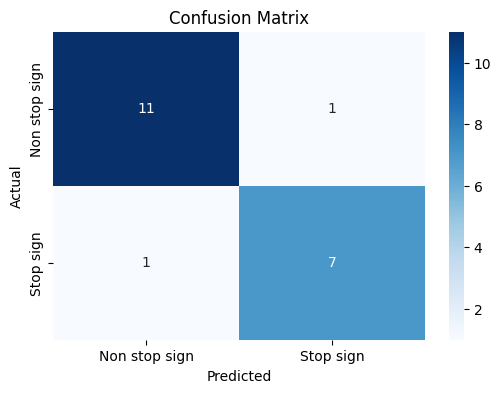

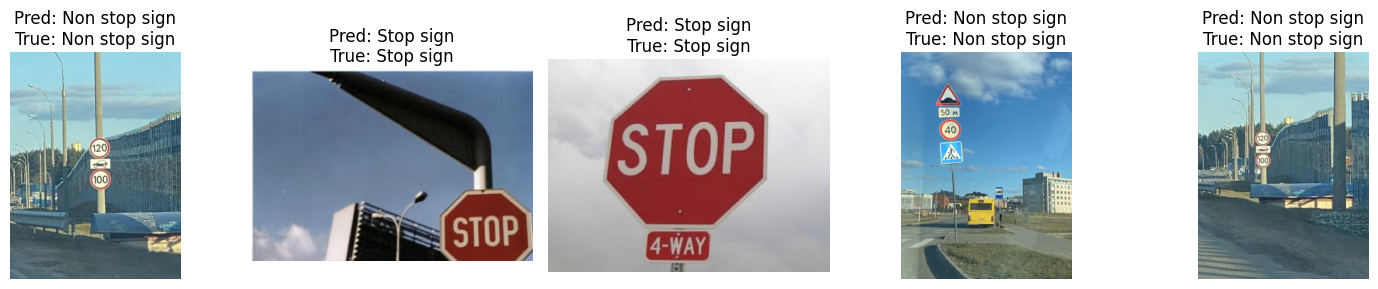

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming model, y_pred, y_test, cm, X_test_indices, original_images, categories are defined from Cell 1

# Visualize confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=categories, yticklabels=categories)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Visualize 5 random test predictions
num_samples = 5
test_indices = np.random.choice(len(X_test), num_samples, replace=False)

plt.figure(figsize=(15, 3))
for i, idx in enumerate(test_indices):
    orig_idx = X_test_indices[idx]
    plt.subplot(1, num_samples, i + 1)
    original_rgb = cv2.cvtColor(original_images[orig_idx], cv2.COLOR_BGR2RGB)
    plt.imshow(original_rgb)
    pred_label = categories[y_pred[idx]]
    true_label = categories[y_test[idx]]
    plt.title(f"Pred: {pred_label}\nTrue: {true_label}")
    if pred_label != true_label:
        plt.title(f"Pred: {pred_label}\nTrue: {true_label}", color='red')
    plt.axis('off')

plt.tight_layout()
plt.show()

# **Evaluate on Unseen data**

In [ ]:
from skimage.feature import hog
import cv2
import numpy as np

# Assuming model, IMG_SIZE, and categories are defined from previous steps

def predict_stop_sign(image_path):
    # Step 1: Load and preprocess the image
    img = cv2.imread(image_path)
    if img is None:
        raise ValueError(f"Could not load image at {image_path}")
    img_resized = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
    img_gray = cv2.cvtColor(img_resized, cv2.COLOR_BGR2GRAY)
    img_normalized = img_gray / 255.0

    # Step 2: Extract HOG features
    img_features = hog(img_normalized, pixels_per_cell=(8, 8), cells_per_block=(2, 2), feature_vector=True)

    # Step 3: Predict using the trained model
    prediction = model.predict([img_features])[0]
    return categories[prediction], img, img_normalized, img_features

# Test with a new image
test_image = "/content/drive/MyDrive/project_445/Test images/Non stop sign/road108.png"  # Replace with your image path
result, test_img_original, test_img_processed, test_img_features = predict_stop_sign(test_image)
print("Prediction:", result)

Prediction: Non stop sign


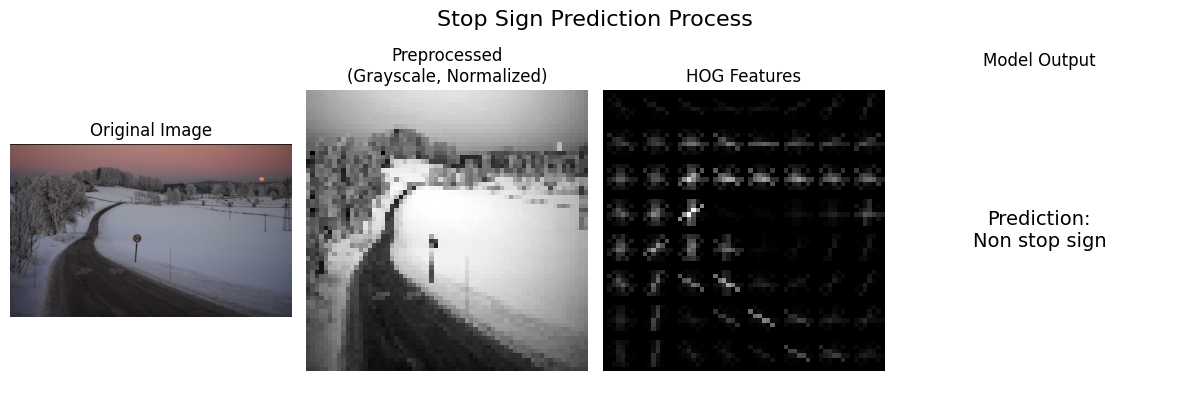

In [ ]:
import matplotlib.pyplot as plt

# Assuming test_img_original, test_img_processed, result, and model are defined from Cell 1

plt.figure(figsize=(12, 4))

# Original image
plt.subplot(1, 4, 1)
original_rgb = cv2.cvtColor(test_img_original, cv2.COLOR_BGR2RGB)
plt.imshow(original_rgb)
plt.title("Original Image")
plt.axis('off')

# Preprocessed image (grayscale, normalized)
plt.subplot(1, 4, 2)
plt.imshow(test_img_processed, cmap='gray')
plt.title("Preprocessed\n(Grayscale, Normalized)")
plt.axis('off')

# HOG visualization
plt.subplot(1, 4, 3)
_, hog_image = hog(test_img_processed, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=True)
plt.imshow(hog_image, cmap='gray')
plt.title("HOG Features")
plt.axis('off')

# Prediction result
plt.subplot(1, 4, 4)
plt.text(0.5, 0.5, f"Prediction:\n{result}",
         fontsize=14, ha='center', va='center')
plt.title("Model Output")
plt.axis('off')

plt.suptitle("Stop Sign Prediction Process", fontsize=16)
plt.tight_layout()
plt.show()